In [1]:
import json
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [2]:
pd.set_option('display.max_columns', 999)
%matplotlib inline
mpl.rcParams['figure.facecolor'] = 'white'

In [3]:
HOME_TEAM = "England"
AWAY_TEAM = "Germany"

PITCH_IMG = cv2.imread("./reasources/images/soccer-field-resized.png")
PITCH_MAX_X = 570
PITCH_MAX_Y = 333
PITCH_MIN_X = 27
PITCH_MIN_Y = 10

In [4]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [5]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [6]:
match_html_path = './reasources/htmls/England 2-0 Germany - European Championship 2020 Live.html'
json_data_txt = extract_json_from_html(match_html_path)

In [7]:
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [8]:
teams_dict

{345: 'England', 336: 'Germany'}

In [9]:
players_df.head()

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,110189,1,Jordan Pickford,GK,185,77,27,True,False,home,"{'totalSaves': {'3': 1.0, '31': 1.0, '49': 1.0...",NaN,NaN,NaN,NaN,NaN,NaN,345
1,69778,2,Kyle Walker,DC,178,70,31,True,False,home,"{'possession': {'0': 1.0, '1': 1.0, '2': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
2,99487,6,Harry Maguire,DC,194,100,28,True,True,home,"{'possession': {'0': 2.0, '4': 2.0, '5': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
3,101374,5,John Stones,DC,188,70,27,True,False,home,"{'possession': {'0': 1.0, '4': 2.0, '5': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
4,83078,12,Kieran Trippier,DMR,178,71,30,True,False,home,"{'possession': {'4': 2.0, '6': 1.0, '11': 1.0,...",NaN,NaN,NaN,NaN,NaN,NaN,345


In [10]:
df = pd.DataFrame(events_dict)
df.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,relatedEventId,relatedPlayerId,isGoal
0,2.308643e+09,2,0,0.0,345,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.308643e+09,2,0,0.0,336,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.308643e+09,3,0,1.0,336,49.8,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 140, 'displayName': 'PassE...","[90, 116, 29, 34, 36, 215, 217]",True,130903.0,36.0,56.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.308643e+09,4,0,2.0,336,35.7,56.6,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 116, 29, 34, 37, 215, 217]",True,31772.0,34.5,46.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.308643e+09,5,0,3.0,336,33.8,46.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 140, 'displayName': 'PassE...","[90, 116, 29, 34, 36, 214, 217]",True,115519.0,26.9,52.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[(df.isShot == True) & (df.teamId == 345)]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,relatedEventId,relatedPlayerId,isGoal
249,2.308646e+09,131,15,26.0,345,72.7,54.5,15,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 15, 'displayName': 'SavedShot'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 103, 'displayName': 'GoalM...","[90, 8, 9, 2, 3, 11]",True,97692.0,NaN,NaN,98.5,49.8,13.9,46.1,True,NaN,130.0,332325.0,NaN
256,2.308646e+09,135,16,4.0,345,87.4,47.5,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 15, 'displayName': 'SavedShot'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 146, 'displayName': 'Block...","[90, 8, 9, 1, 5, 13]",True,99487.0,NaN,NaN,98.5,49.6,18.4,48.3,True,NaN,133.0,83078.0,NaN
439,2.308649e+09,239,26,19.0,345,92.2,53.0,26,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 13, 'displayName': 'MissedShots'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 55, 'displayName': 'Relate...","[90, 6, 89, 9, 1, 5, 13]",True,99487.0,NaN,NaN,NaN,NaN,54.2,37.5,True,NaN,238.0,83078.0,NaN
1265,2.308662e+09,672,74,46.0,345,95.9,50.6,76,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 16, 'displayName': 'Goal'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 22, 'displayName': 'Regula...","[90, 23, 8, 9, 201, 0, 3, 11, 15, 18, 24]",True,97692.0,NaN,NaN,NaN,NaN,0.6,48.4,True,NaN,671.0,118244.0,True
1395,2.308664e+09,741,85,4.0,345,93.7,49.2,87,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 16, 'displayName': 'Goal'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 23, 8, 9, 201, 1, 3, 13, 16, 18, 26]",True,83532.0,NaN,NaN,NaN,NaN,17.1,47.6,True,NaN,740.0,113069.0,True


In [12]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'cardType', 'relatedEventId', 'relatedPlayerId', 'isGoal'],
      dtype='object')

In [13]:
df = pd.DataFrame(events_dict)

df["eventType"] = df.apply(lambda row: row["type"]["displayName"], axis=1)
df["outcomeType"] = df.apply(lambda row: row["outcomeType"]["displayName"], axis=1)
df["half"] = df.apply(lambda row: row["period"]["displayName"], axis=1)

df["x"] = df["x"].apply(lambda row: PITCH_MIN_X + row * (PITCH_MAX_X - PITCH_MIN_X) / 99.5)
df["endX"] = df["endX"].apply(lambda row: PITCH_MIN_X + row * (PITCH_MAX_X - PITCH_MIN_X) / 99.5)
df["blockedX"] = df["blockedX"].apply(lambda row: PITCH_MIN_X + row * (PITCH_MAX_X - PITCH_MIN_X) / 99.5)
df["y"] = df["y"].apply(lambda row: PITCH_MIN_Y + row * (PITCH_MAX_Y - PITCH_MIN_Y) / 100)
df["endY"] = df["endY"].apply(lambda row: PITCH_MIN_Y + row * (PITCH_MAX_Y - PITCH_MIN_Y) / 100)
df["blockedY"] = df["blockedY"].apply(lambda row: PITCH_MIN_Y + row * (PITCH_MAX_Y - PITCH_MIN_Y) / 100)
df["goalMouthY"] = df["goalMouthY"].apply(lambda row: PITCH_MIN_Y + row * (PITCH_MAX_Y - PITCH_MIN_Y) / 100)

df["time"] = df["minute"] + df["second"] / 100

df.replace(teams_dict, inplace=True)

recivers= []
for idx, row in df.iterrows():
    if row["eventType"] == "Pass" and row["outcomeType"] == "Successful":
        player_team = players_df[players_df.playerId == row["playerId"]]["teamId"].item()
        try:
            reciver_team = players_df[players_df.playerId == df.iloc[idx+1, 14]]["teamId"].item()
        except ValueError:
            reciver_team = 0
        # print(player_team, reciver_team)
        if player_team == reciver_team:
            recivers.append(df.iloc[idx+1, 14])
        else:
            recivers.append(np.nan)
    else:
        recivers.append(np.nan)
df["reciverId"] = recivers

df.drop(columns=["id", "period", "type", "minute", "second"], inplace=True)
# TODO change columns order
df.head()

,eventId,teamId,x,y,expandedMinute,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,relatedEventId,relatedPlayerId,isGoal,eventType,half,time,reciverId
0,2,England,27.000000,10.000,0,Successful,[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Start,FirstHalf,0.00,NaN
1,2,Germany,27.000000,10.000,0,Successful,[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Start,FirstHalf,0.00,NaN
2,3,Germany,298.772864,171.500,0,Successful,"[{'type': {'value': 140, 'displayName': 'PassE...","[90, 116, 29, 34, 36, 215, 217]",True,130903.0,223.462312,192.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,0.01,31772.0
3,4,Germany,221.825126,192.818,0,Successful,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 116, 29, 34, 37, 215, 217]",True,31772.0,215.276382,160.518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,0.02,115519.0
4,5,Germany,211.456281,159.549,0,Successful,"[{'type': {'value': 140, 'displayName': 'PassE...","[90, 116, 29, 34, 36, 214, 217]",True,115519.0,173.801005,180.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,0.03,21541.0


In [14]:
df[["x", "y", "endX", "endY"]].describe()

,x,y,endX,endY
count,1519.000000,1519.000000,1074.000000,1074.000000
mean,262.756211,162.188286,289.521900,166.590641
std,129.136443,90.300628,123.731248,91.615443
min,27.000000,10.000000,27.000000,10.000000
25%,174.346734,88.327500,199.450251,87.843000
50%,253.477387,160.841000,274.487940,163.102000
75%,359.348744,234.646500,375.720603,244.821000
max,570.000000,333.000000,572.728643,333.000000


In [15]:
FIRST_HOME_SUB = df[(df.eventType == 'SubstitutionOn') & (df.teamId == HOME_TEAM)]["time"].head(1).item()
FIRST_AWAY_SUB = df[(df.eventType == 'SubstitutionOn') & (df.teamId == AWAY_TEAM)]["time"].head(1).item()

In [16]:
def get_value_from_qualifiers(row, key):
    for d in row:
        if d["type"]["displayName"] == key:
            return d["value"]
    return np.nan

In [17]:
passes = df.loc[df.index[df.eventType == "Pass"], ["teamId", "playerId", "x", "y", "endX", "endY", "outcomeType", "half", "time", "qualifiers"]]
passes["length"] = passes.apply(lambda row: get_value_from_qualifiers(row["qualifiers"], "Length"), axis=1)
passes["zone"] = passes.apply(lambda row: get_value_from_qualifiers(row["qualifiers"], "Zone"), axis=1)
passes.drop(columns=["qualifiers"], inplace=True)
passes

,teamId,playerId,x,y,endX,endY,outcomeType,half,time,length,zone
2,Germany,130903.0,298.772864,171.500,223.462312,192.172,Successful,FirstHalf,0.01,15.1,Back
3,Germany,31772.0,221.825126,192.818,215.276382,160.518,Successful,FirstHalf,0.02,6.9,Back
4,Germany,115519.0,211.456281,159.549,173.801005,180.544,Successful,FirstHalf,0.03,8.5,Back
5,Germany,21541.0,173.801005,180.544,213.093467,31.964,Successful,FirstHalf,0.05,32.2,Back
6,Germany,283323.0,203.816080,58.450,487.594975,174.730,Unsuccessful,FirstHalf,0.09,59.8,Center
...,...,...,...,...,...,...,...,...,...,...,...
1503,Germany,144711.0,400.278392,250.635,417.741709,215.428,Unsuccessful,SecondHalf,93.55,8.1,Center
1504,England,270446.0,177.075377,149.213,225.645226,178.283,Unsuccessful,SecondHalf,93.55,11.2,Back
1505,Germany,111212.0,360.985930,170.531,377.357789,84.290,Successful,SecondHalf,93.58,18.4,Center
1506,Germany,31772.0,376.266332,89.458,518.155779,190.234,Unsuccessful,SecondHalf,94.01,34.6,Center


In [18]:
england_passes = passes[(passes.teamId == HOME_TEAM)]
england_passes

,teamId,playerId,x,y,endX,endY,outcomeType,half,time,length,zone
8,England,110189.0,107.222111,159.549,176.529648,93.657,Successful,FirstHalf,0.15,19.2,Back
9,England,69778.0,177.621106,93.334,179.258291,129.510,Successful,FirstHalf,0.17,7.6,Back
10,England,101374.0,173.255276,131.771,192.901508,261.294,Successful,FirstHalf,0.19,27.5,Back
11,England,99487.0,213.093467,273.245,315.144724,294.563,Successful,FirstHalf,0.23,20.1,Left
12,England,97692.0,282.401005,296.501,224.008040,290.364,Successful,FirstHalf,0.26,11.3,Back
...,...,...,...,...,...,...,...,...,...,...,...
1458,England,110189.0,52.103518,190.557,364.806030,258.387,Unsuccessful,SecondHalf,91.43,61.8,Center
1464,England,270446.0,316.236181,235.777,457.579899,256.772,Unsuccessful,SecondHalf,91.50,27.6,Center
1477,England,118244.0,155.791960,222.211,217.459296,204.769,Successful,SecondHalf,92.16,12.4,Back
1484,England,110189.0,107.222111,272.276,499.601005,229.963,Unsuccessful,SecondHalf,92.47,76.0,Center


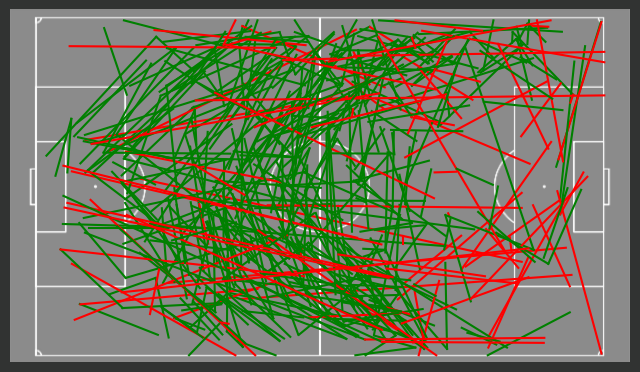

In [19]:
fig, ax = plt.subplots(figsize=(8,9))

fig.set_facecolor("#313332")

ax.imshow(PITCH_IMG)
ax.axis("off")
for idx, row in england_passes.iterrows():
    x_values = (row["x"], row["endX"])
    y_values = (row["y"], row["endY"])
    color = "green" if row["outcomeType"] == "Successful" else "red"
    ax.plot(x_values, y_values, color=color)
plt.show()

England's goalkeeper passes

In [20]:
england_goalkeeper_passes = england_passes[england_passes["playerId"] == 110189]
england_goalkeeper_passes.head()

,teamId,playerId,x,y,endX,endY,outcomeType,half,time,length,zone
8,England,110189.0,107.222111,159.549,176.529648,93.657,Successful,FirstHalf,0.15,19.2,Back
26,England,110189.0,151.971859,263.232,535.619095,229.317,Unsuccessful,FirstHalf,1.49,74.2,Center
67,England,110189.0,79.389950,156.965,213.639196,31.964,Successful,FirstHalf,4.06,36.9,Back
86,England,110189.0,72.295477,125.311,330.970854,82.675,Unsuccessful,FirstHalf,5.01,50.6,Center
103,England,110189.0,112.679397,172.469,182.532663,268.077,Successful,FirstHalf,5.47,24.2,Back


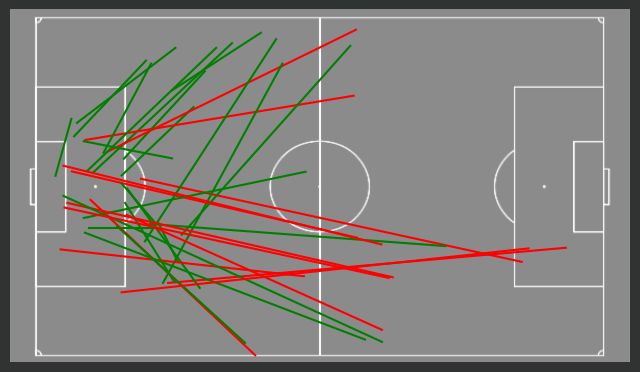

In [21]:
fig, ax = plt.subplots(figsize=(8,9))

fig.set_facecolor("#313332")

ax.imshow(PITCH_IMG)
ax.axis("off")

for idx, row in england_goalkeeper_passes.iterrows():
    x_values = (row["x"], row["endX"])
    y_values = (row["y"], row["endY"])
    color = "green" if row["outcomeType"] == "Successful" else "red"
    ax.plot(x_values, y_values, color=color)
plt.show()

In [22]:
avg_position = england_passes.loc[df.time < FIRST_HOME_SUB].groupby(["playerId"])[["x", "y"]].mean()

In [23]:
by_player = df[(df.teamId == HOME_TEAM) & (df.eventType == "Pass") & (df.outcomeType == "Successful") & (df.time < FIRST_HOME_SUB)]\
            .groupby(['playerId', 'reciverId'])\
            .size()\
            .reset_index(name="Count")\
            .pivot(index="playerId", columns="reciverId", values="Count")\
            .merge(avg_position, how="right", on="playerId")
by_player


,69778.0,83078.0,83532.0,97692.0,99487.0,101374.0,110189.0,118244.0,270446.0,332325.0,367185.0,x,y
playerId,,,,,,,,,,,,,
69778.0,NaN,6.0,1.0,NaN,2.0,8.0,6.0,NaN,12.0,2.0,6.0,266.945558,83.644000
83078.0,7.0,NaN,1.0,2.0,3.0,3.0,3.0,1.0,5.0,2.0,11.0,355.168462,60.840200
83532.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,2.0,3.0,358.484673,214.028333
97692.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,2.0,2.0,4.0,1.0,354.519045,263.619600
99487.0,6.0,NaN,2.0,4.0,NaN,11.0,1.0,10.0,2.0,2.0,1.0,257.094426,247.134581
101374.0,8.0,3.0,NaN,1.0,11.0,NaN,6.0,4.0,10.0,6.0,1.0,216.207331,149.529667
110189.0,5.0,2.0,2.0,NaN,3.0,5.0,NaN,1.0,2.0,NaN,NaN,99.723395,175.041037
118244.0,NaN,NaN,NaN,5.0,10.0,2.0,NaN,NaN,1.0,6.0,3.0,309.831895,298.420000
270446.0,7.0,9.0,NaN,2.0,4.0,6.0,2.0,NaN,NaN,8.0,NaN,307.405299,126.713114


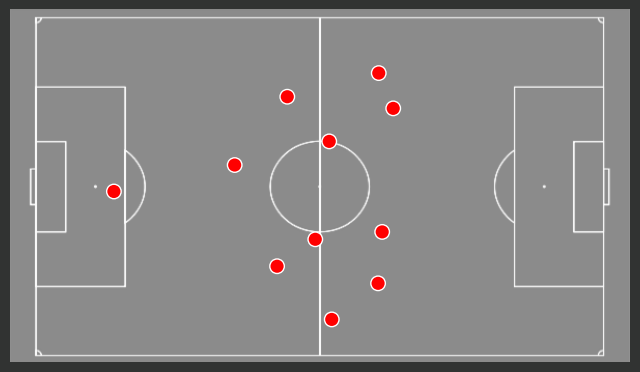

In [24]:
fig, ax = plt.subplots(figsize=(8,9))

fig.set_facecolor("#313332")

ax.imshow(PITCH_IMG)
ax.axis("off")

for idx, row in by_player.iterrows():
    player_circle = plt.Circle((row["x"], row["y"]), radius=7, color="r", ec="white")
    ax.add_patch(player_circle)

plt.show()

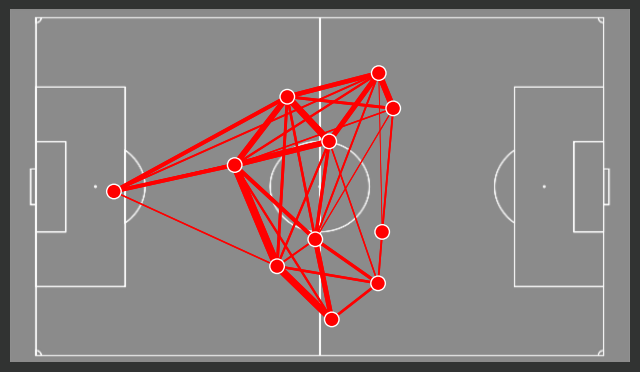

In [25]:
fig, ax = plt.subplots(figsize=(8,9))

fig.set_facecolor("#313332")

ax.imshow(PITCH_IMG)
ax.axis("off")

players_id = by_player.columns[:-2]

for idx, row in by_player.iterrows():
    player_id = row.name
    for reciver_id in players_id:
        count = by_player.loc[player_id, reciver_id] + by_player.loc[reciver_id, player_id]
        x_values = (by_player.loc[player_id, "x"], by_player.loc[reciver_id, "x"])
        y_values = (by_player.loc[player_id, "y"], by_player.loc[reciver_id, "y"])
        ax.plot(x_values, y_values, color="r", linewidth=count/4, zorder=1)

for idx, row in by_player.iterrows():
    player_circle = plt.Circle((row["x"], row["y"]), radius=7, color="r", ec="white", zorder=2)
    ax.add_patch(player_circle)


plt.show()

In [26]:
england_shots = df[(df.isShot == True) & (df.teamId == "England")]
england_shots

,eventId,teamId,x,y,expandedMinute,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,relatedEventId,relatedPlayerId,isGoal,eventType,half,time,reciverId
249,131,England,423.744724,186.035,15,Successful,"[{'type': {'value': 103, 'displayName': 'GoalM...","[90, 8, 9, 2, 3, 11]",True,97692.0,NaN,NaN,564.542714,170.854,13.9,158.903,True,NaN,130.0,332325.0,NaN,SavedShot,FirstHalf,15.26,NaN
256,135,England,503.966834,163.425,16,Successful,"[{'type': {'value': 146, 'displayName': 'Block...","[90, 8, 9, 1, 5, 13]",True,99487.0,NaN,NaN,564.542714,170.208,18.4,166.009,True,NaN,133.0,83078.0,NaN,SavedShot,FirstHalf,16.04,NaN
439,239,England,530.161809,181.190,26,Successful,"[{'type': {'value': 55, 'displayName': 'Relate...","[90, 6, 89, 9, 1, 5, 13]",True,99487.0,NaN,NaN,NaN,NaN,54.2,131.125,True,NaN,238.0,83078.0,NaN,MissedShots,FirstHalf,26.19,NaN
1265,672,England,550.353769,173.438,76,Successful,"[{'type': {'value': 22, 'displayName': 'Regula...","[90, 23, 8, 9, 201, 0, 3, 11, 15, 18, 24]",True,97692.0,NaN,NaN,NaN,NaN,0.6,166.332,True,NaN,671.0,118244.0,True,Goal,SecondHalf,74.46,NaN
1395,741,England,538.347739,168.916,87,Successful,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 23, 8, 9, 201, 1, 3, 13, 16, 18, 26]",True,83532.0,NaN,NaN,NaN,NaN,17.1,163.748,True,NaN,740.0,113069.0,True,Goal,SecondHalf,85.04,NaN


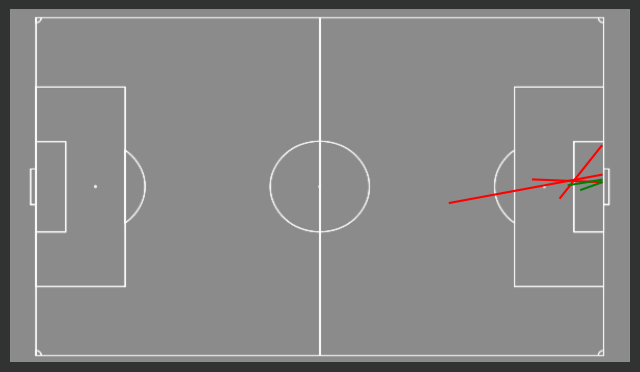

In [27]:
fig, ax = plt.subplots(figsize=(8,9))

fig.set_facecolor("#313332")

ax.imshow(PITCH_IMG)
ax.axis("off")
for idx, row in england_shots.iterrows():
    x_values = (row["x"], PITCH_MAX_X)
    y_values = (row["y"], row["goalMouthY"])
    color = "green" if row["eventType"] == "Goal" else "red"
    ax.plot(x_values, y_values, color=color)
plt.show()

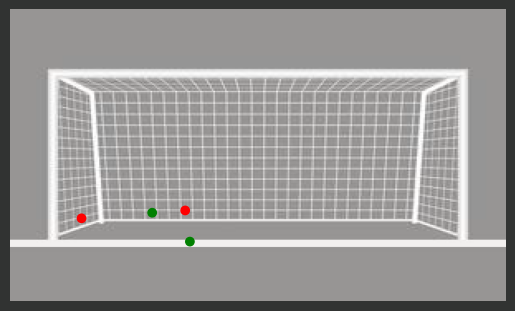

In [28]:
shots_x = []
shots_y = []
colors = []
fig, ax = plt.subplots()
fig.set_facecolor("#313332")
goal_img = cv2.imread("./reasources/images/goal.jpg")
a, b = int(PITCH_MIN_Y + (PITCH_MAX_Y - PITCH_MIN_Y) * 31/68), int(PITCH_MAX_Y - (PITCH_MAX_Y - PITCH_MIN_Y) * 31/68)
ax.imshow(goal_img, extent=[a - 3, b + 3, 0, 20])
for idx, row in england_shots.iterrows():
    if row["eventType"] != "MissedShots":
        shots_x.append(row.goalMouthY)
        shots_y.append(4 + row.goalMouthZ * 12 / 100)
        if row.eventType == "Goal":
            colors.append("green")
        else:
            colors.append("red")
ax.scatter(shots_x, shots_y, c=colors)
ax.axis("off")
plt.show()

In [33]:
DECLAN_RICE = 332325
dr_events = df[df.playerId == DECLAN_RICE]
dr_events["eventType"].unique()

array(['Clearance', 'Pass', 'TakeOn', 'Foul', 'Card', 'Save', 'Tackle',
       'BallRecovery', 'Dispossessed', 'Interception', 'Challenge',
       'BallTouch', 'SubstitutionOff'], dtype=object)

to drop: 'Card', 'SubstitutionOff'

defensive: 'Clearance', 'BallRecovery', 'Interception', 'Save'

action with ball: 'Pass'[S], 'BallTouch', 'TakeOn'

challenges: 'Tackle', 'Challenge', 'Foul'

loss: 'Dispossessed', 'Pass'[U]
       

In [34]:
def get_event_category(event_type, event_outcome):
    if event_type in ['Clearance', 'BallRecovery', 'Interception', 'Save']:
        return "Defensive action"
    elif event_type in ['BallTouch', 'TakeOn'] or (event_type == 'Pass' and event_outcome == 'Successful'):
        return "Action with ball"
    elif event_type in ['Tackle', 'Challenge', 'Foul']:
        return "Challenge"
    else:
        return "Ball losses"

In [38]:
idx_to_drop = dr_events[dr_events.eventType.isin(['Card', 'SubstitutionOff'])].index
dr_events.drop(idx_to_drop, inplace=True)
dr_events["eventCategory"] = dr_events.apply(lambda row: get_event_category(row.eventType, row.outcomeType), axis=1)
dr_events[["x", "y"]].describe()

C:\Users\Jędrek\AppData\Local\Temp\ipykernel_12596\3322832971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_events.drop(idx_to_drop, inplace=True)
C:\Users\Jędrek\AppData\Local\Temp\ipykernel_12596\3322832971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_events["eventCategory"] = dr_events.apply(lambda row: get_event_category(row.eventType, row.outcomeType), axis=1)


,x,y
count,61.000000,61.000000
mean,287.572008,204.964918
std,100.257477,74.846757
min,85.392965,18.398000
25%,203.816080,166.332000
50%,305.321608,220.596000
75%,351.708543,264.524000
max,541.622111,319.111000


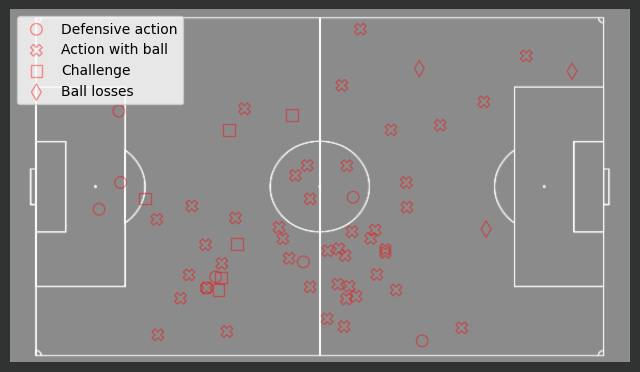

In [77]:
fig, ax = plt.subplots(figsize=(8,9))

fig.set_facecolor("#313332")
markers = {"Defensive action": "o", "Action with ball": "X", "Challenge": "s", "Ball losses": "d"}

ax.imshow(PITCH_IMG)
ax.axis("off")
for key in markers.keys():
    ax.scatter(dr_events[dr_events.eventCategory == key]["x"], dr_events[dr_events.eventCategory == key]["y"], s=70, facecolors='none', edgecolors='r', alpha=0.4, marker=markers[key], label=key)
ax.legend(markers)

plt.show()

In [69]:
dr_events.head(4)

,eventId,teamId,x,y,expandedMinute,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,relatedEventId,relatedPlayerId,isGoal,eventType,half,time,reciverId,eventCategory
63,23,England,104.493467,97.533,3,Successful,"[{'type': {'value': 141, 'displayName': 'PassE...","[90, 93, 94, 214]",True,332325.0,196.721608,98.502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clearance,FirstHalf,3.46,NaN,Defensive action
99,44,England,225.645226,95.272,5,Successful,"[{'type': {'value': 141, 'displayName': 'PassE...","[90, 116, 29, 34, 37, 215, 217]",True,332325.0,220.187940,28.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,5.35,69778.0,Action with ball
106,51,England,288.949749,182.159,6,Unsuccessful,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 52]",True,332325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TakeOn,FirstHalf,6.00,NaN,Action with ball
147,65,England,129.596985,181.836,7,Unsuccessful,"[{'type': {'value': 233, 'displayName': 'Oppos...",[63],False,332325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foul,FirstHalf,7.14,NaN,Challenge
